# Using Gradient Descend to Find Cubics

In [25]:
def eval_2nd_degree(coeffs, x):
    """
    Function to return the output of evaluating a second degree polynomial,
    given a specific x value.
    
    Args:
        coeffs: List containing the coefficients a,b, and c for the polynomial.
        x: The input x value to the polynomial.
    
    Returns:
        y: The corresponding output y value for the second degree polynomial.
    
    """
    a = (coeffs[0]*(x*x))
    b = coeffs[1]*x
    c = coeffs[2]
    y = a+b+c
    return y

In [26]:
import numpy as np
import matplotlib.pyplot as plt

hundred_xs=np.random.uniform(-10,10,100)
print(hundred_xs)

[-1.21054315  4.68308252  2.2164292   5.11087521  8.58584465  4.52235869
 -6.11249858 -1.87387243 -4.26564779 -8.55063404 -3.60780536  2.95603339
  8.01418258 -8.97613383 -7.33446553  0.87205182  1.15311434  3.38654718
 -8.52887056  4.8368447   2.57797296  9.0251886   2.95965701 -0.44915003
 -6.66521695 -5.35743227 -7.46364089 -2.15269719 -6.34826795  3.00051032
  2.29334304  9.80856631 -1.30998148  1.82726913 -2.93024303  2.97667592
 -6.11166243 -1.98405346 -3.75149142  9.77678098 -2.64907094  7.62578012
  8.36463931  8.61669169  0.78088515  7.90926281 -7.10807485  8.17220613
 -9.55263253  4.38745822  8.24868009  1.01753866 -4.66952024  7.46126929
 -5.63925443  0.32410414 -3.69711337 -1.67544939 -6.75079754  1.98275913
  2.76965586  0.55658659 -0.88917458  1.82798948  7.99339966  4.87383976
  7.82194029  8.61578456 -5.42836334 -0.77218066  3.04947047 -0.29035777
 -9.79881783  4.33063502 -3.28707629  6.42942106 -7.52932389  8.05166168
 -6.20277698  4.55902629 -4.42528952  7.8671937   4

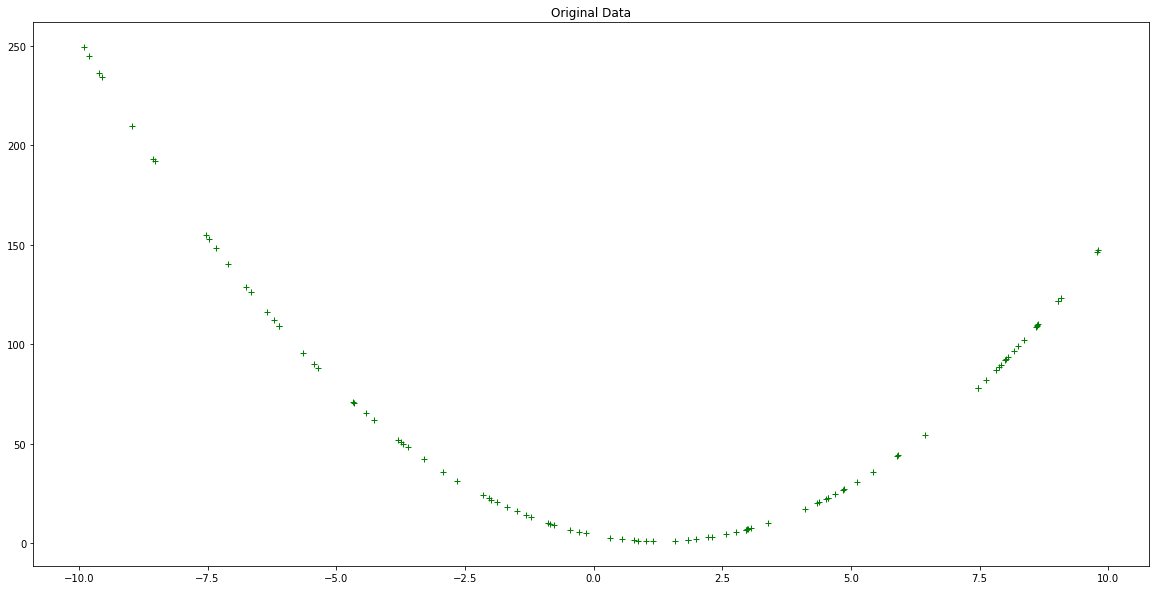

In [27]:
coeffs = [2, -5, 4]
x_y_pairs = []
for x in hundred_xs:
    y  = eval_2nd_degree(coeffs, x)
    x_y_pairs.append((x,y))
    
xs = []
ys = []
for a,b in x_y_pairs:
    xs.append(a)
    ys.append(b)
    
plt.figure(figsize=(20,10))
plt.plot(xs, ys, 'g+')
plt.title('Original Data')
plt.show()

In [28]:
import random

def eval_2nd_degree_jitter(coeffs, x, j):
    """
    Function to return the noisy output of evaluating a second degree polynomial,
    given a specific x value. Output values can be within [y−j,y+j].
    
    Args:
        coeffs: List containing the coefficients a,b, and c for the polynomial.
        x: The input x value to the polynomial.
        j: Jitter parameter, to introduce noise to output y.
    
    Returns:
        y: The corresponding jittered output y value for the second degree polynomial.
    
    """
    a = (coeffs[0]*(x*x))
    b = coeffs[1]*x
    c = coeffs[2]
    y = a+b+c
    
    interval = [y-j, y+j]
    interval_min = interval[0]
    interval_max = interval[1]
    jit_val = random.random() * interval_max      # Generate a random number in range 0 to interval max 
    
    while interval_min > jit_val:                 # While the random jitter value is less than the interval min,
        jit_val = random.random() * interval_max  # it is not in the right range. Re-roll the generator until it 
                                                  # give a number greater than the interval min. 
    
    return jit_val

In [29]:
x=3
j=2
eval_2nd_degree_jitter(coeffs, x, j)

5.590458294363584

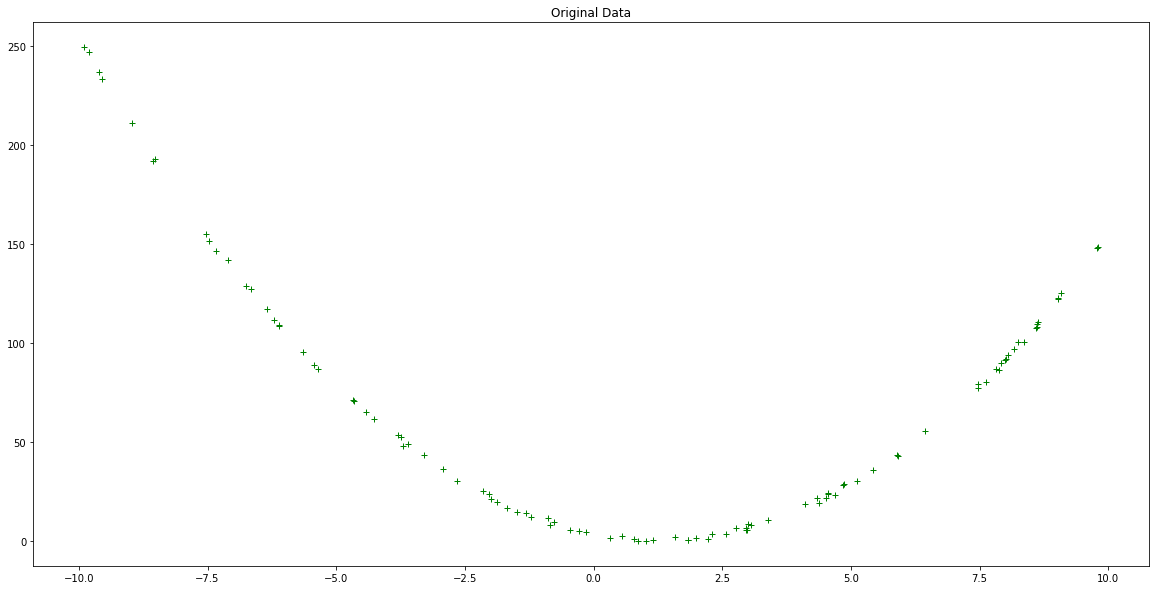

In [30]:
x_y_pairs = []
for x in hundred_xs:
    y  = eval_2nd_degree_jitter(coeffs, x, j)
    x_y_pairs.append((x,y))
    
xs = []
ys = []
for a,b in x_y_pairs:
    xs.append(a)
    ys.append(b)
    
plt.figure(figsize=(20,10))
plt.plot(xs, ys, 'g+')
plt.title('Original Data')
plt.show()

In [31]:
rand_coeffs = (random.randrange(-10, 10), random.randrange(-10, 10), random.randrange(-10,10))
rand_coeffs

(6, -5, 4)

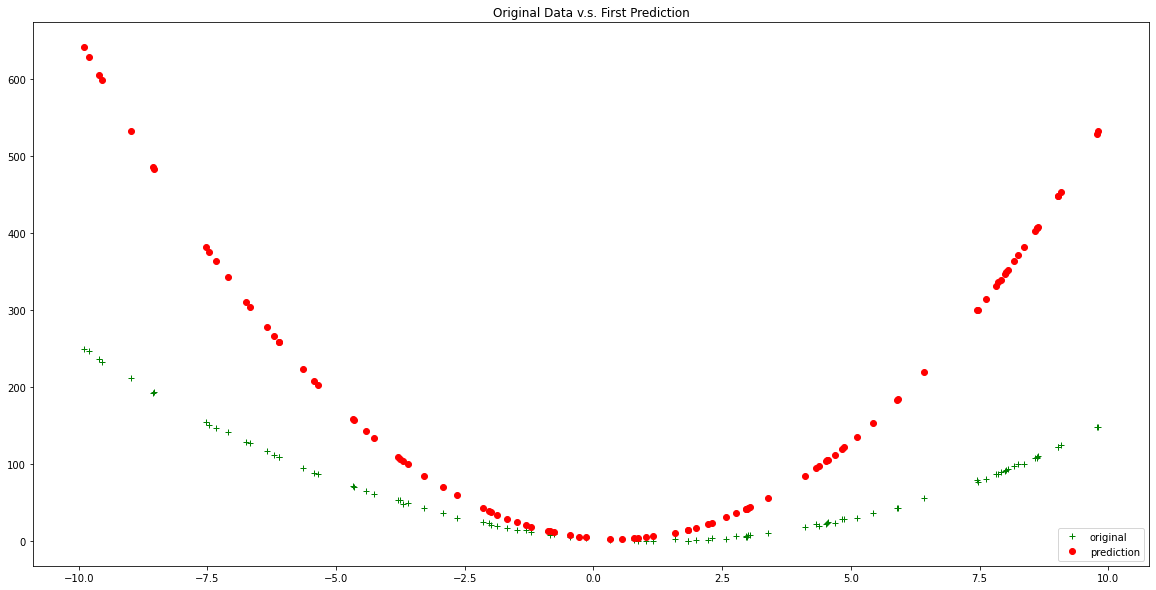

In [32]:
y_bar = eval_2nd_degree(rand_coeffs, hundred_xs)

plt.figure(figsize=(20,10))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, y_bar, 'ro', label='prediction')
plt.title('Original Data v.s. First Prediction')
plt.legend(loc="lower right")
plt.show()

In [33]:
def loss_mse(ys, y_bar):
    """
    Calculates Mean Squared Error (MSE) loss.
    
    Args:
        ys: training data labels
        y_bar: prediction labels
    
    Returns: Calculated MSE loss.
    """
    
    return sum( (ys-y_bar)**2) / len(ys)

initial_model_loss = loss_mse(ys, y_bar)
  
initial_model_loss

31661.215082465755

In [34]:
def calc_gradient_2nd_poly_for_GD(coeffs, inputs_x, outputs_y, lr): 
    """
    calculates the gradient for a second degree polynomial.
    
    Args:
        coeffs: a,b and c, for a 2nd degree polynomial [ y = ax^2 + bx + c ]
        inputs_x: x input datapoints
        outputs_y: actual y output points
        lr: learning rate
        
    Returns: Calculated gradients for the 2nd degree polynomial, as a tuple of its parts for a,b,c respectively.
    
    """
    a_s = []
    b_s = []
    c_s = []
        
    y_bars = eval_2nd_degree(coeffs, inputs_x)

    for x,y,y_bar in list(zip(inputs_x, outputs_y, y_bars)):    # take tuple of (x datapoint, actual y label, predicted y label)
        x_squared = x**2        
        partial_a = x_squared * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x * (y-y_bar)
        b_s.append(partial_b)
        partial_c = (y-y_bar)
        c_s.append(partial_c)
    
    num = [i for i in y_bars]
    n = len(num)
    
    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)


    a_new = coeffs[0] - lr * gradient_a
    b_new = coeffs[1] - lr * gradient_b
    c_new = coeffs[2] - lr * gradient_c
    
    new_model_coeffs = (a_new, b_new, c_new)
    
    #update with these new coeffs:
    new_y_bar = eval_2nd_degree(new_model_coeffs, inputs_x)
    
    updated_model_loss = loss_mse(outputs_y, new_y_bar)
    return updated_model_loss, new_model_coeffs, new_y_bar

In [35]:
def gradient_descent(epochs, lr):
    """
    Perform gradient descent for a second degree polynomial.
    
    Args:
        epochs: number of iterations to perform of finding new coefficients and updatingt loss. 
        lr: specified learning rate
        
    Returns: Tuple containing (updated_model_loss, new_model_coeffs, new_y_bar predictions, saved loss updates)
    
    """
    losses = []
    rand_coeffs_to_test = rand_coeffs
    for i in range(epochs):
        loss = calc_gradient_2nd_poly_for_GD(rand_coeffs_to_test, hundred_xs, ys, lr)
        rand_coeffs_to_test = loss[1]
        losses.append(loss[0])
    return loss[0], loss[1], loss[2], losses  #(updated_model_loss, new_model_coeffs, new_y_bar, saved loss updates)

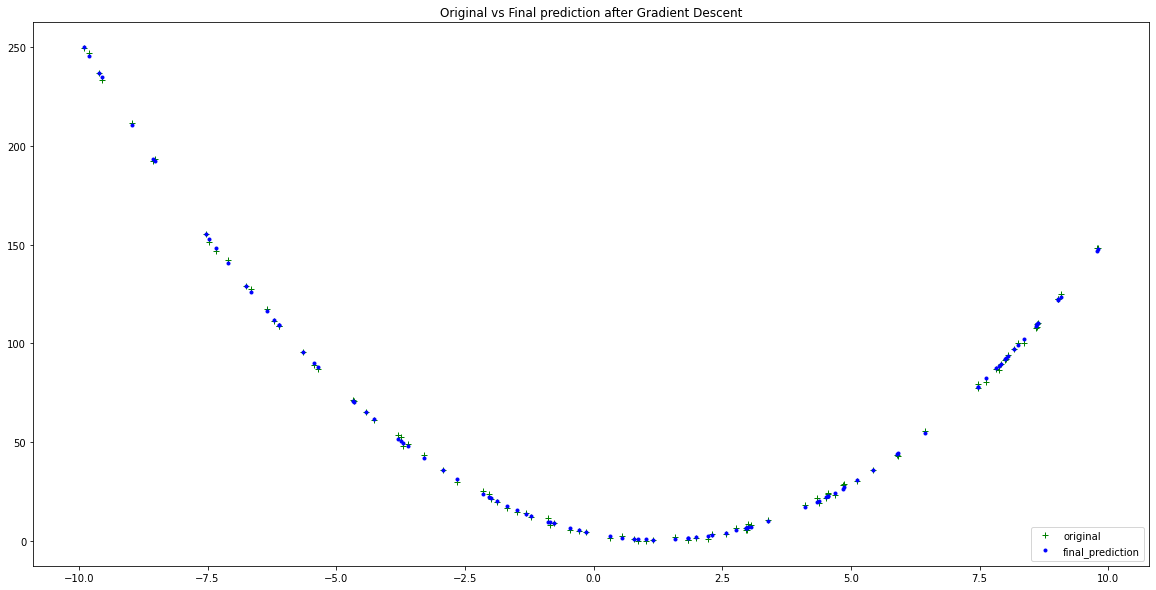

In [36]:
GD = gradient_descent(150000, 0.0001)

plt.figure(figsize=(20,10))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, GD[2], 'b.', label = 'final_prediction')
plt.title('Original vs Final prediction after Gradient Descent')
plt.legend(loc="lower right")
plt.show()

In [37]:
print(f"Final Coefficients predicted: {GD[1]}")
print(f"Original Coefficients: {coeffs}")
print(f"MSE Loss: {GD[0]}")

Final Coefficients predicted: (2.0035581394241233, -4.993842448210837, 3.9672071504092807)
Original Coefficients: [2, -5, 4]
MSE Loss: 1.163098518398722


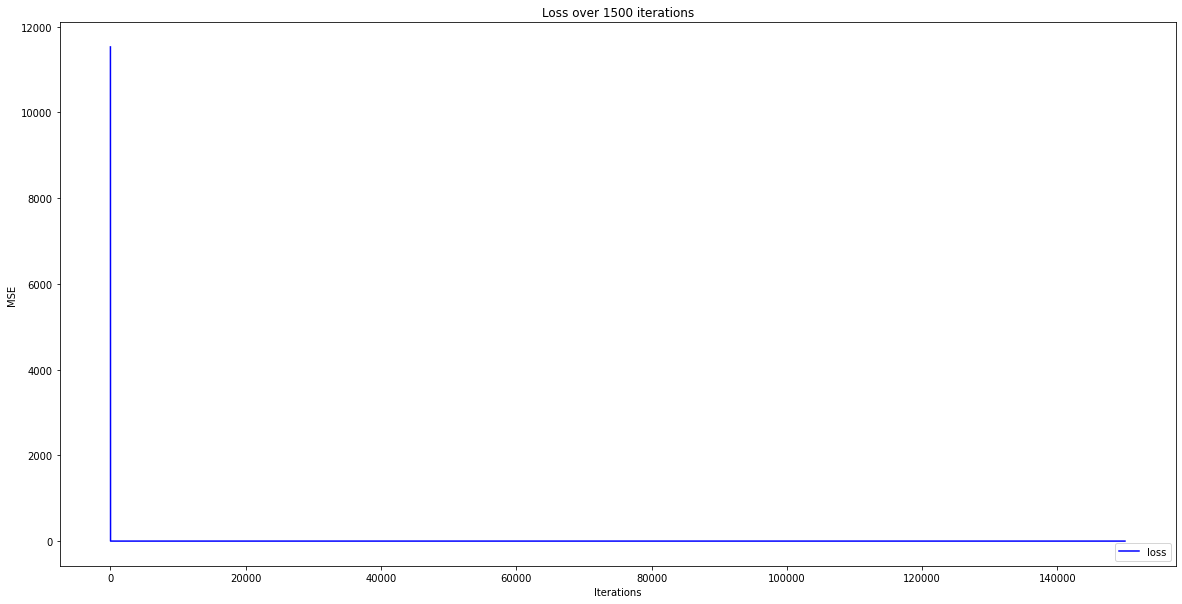

In [38]:
plt.figure(figsize=(20,10))
plt.plot(GD[3], 'b-', label = 'loss')
plt.title('Loss over 1500 iterations')
plt.legend(loc="lower right")
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.show()